In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_cleaned.csv')
data.shape

(891, 25)

In [3]:
data.head()

Survived   Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0   7.2500         0         0         1           0   
1         1  38.0  71.2833         1         0         0           1   
2         1  26.0   7.9250         0         0         1           1   
3         1  35.0  53.1000         1         0         0           1   
4         0  35.0   8.0500         0         0         1           0   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        0        1  ...        1        0        0        0   
1         0        0        1  ...        1        0        0        0   
2         0        1        0  ...        1        0        0        0   
3         0        0        1  ...        1        0        0        0   
4         1        1        0  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0        0           0           0           1  
1        0        0        0           1           0           0  
2        0        0        0           0           0           1  
3        0        0        0           0           0           1  
4        0        0        0           0           0           1  

[5 rows x 25 columns]

In [4]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape , y.shape

((891, 24), (891,))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [10]:
x = pd.DataFrame(x_scale, columns = x.columns)


In [11]:
x.head()

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  0.271174  0.014151       0.0       0.0       1.0         0.0       1.0   
1  0.472229  0.139136       1.0       0.0       0.0         1.0       0.0   
2  0.321438  0.015469       0.0       0.0       1.0         1.0       0.0   
3  0.434531  0.103644       1.0       0.0       0.0         1.0       0.0   
4  0.434531  0.015713       0.0       0.0       1.0         0.0       1.0   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0      0.0      1.0      0.0  ...      1.0      0.0      0.0      0.0   
1      0.0      1.0      0.0  ...      1.0      0.0      0.0      0.0   
2      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   
3      0.0      1.0      0.0  ...      1.0      0.0      0.0      0.0   
4      1.0      0.0      0.0  ...      1.0      0.0      0.0      0.0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0      0.0      0.0      0.0         0.0         0.0         1.0  
1      0.0      0.0      0.0         1.0         0.0         0.0  
2      0.0      0.0      0.0         0.0         0.0         1.0  
3      0.0      0.0      0.0         0.0         0.0         1.0  
4      0.0      0.0      0.0         0.0         0.0         1.0  

[5 rows x 24 columns]

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 56 , stratify = y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [19]:
clf = KNN(n_neighbors = 10)
#fit data or train model on data
clf.fit(x_train , y_train)
test_predict = clf.predict(x_test)
k = f1_score(test_predict , y_test)
print ("F1 score is: " , k)

F1 score is:  0.6875


In [21]:
def Elbow(k):
    test_error = [] 
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(x_train , y_train)
        y_pred = clf.predict(x_test)
        f1 = f1_score(y_pred , y_test)
        error = 1-f1
        test_error.append(error)
    return test_error

In [23]:
k = range(6,20,2)
test = Elbow(k)
test

[0.3492063492063492,
 0.32799999999999996,
 0.3125,
 0.32307692307692304,
 0.32307692307692304,
 0.328125,
 0.32307692307692304]

Text(0.5, 1.0, 'Elbow curve for test')

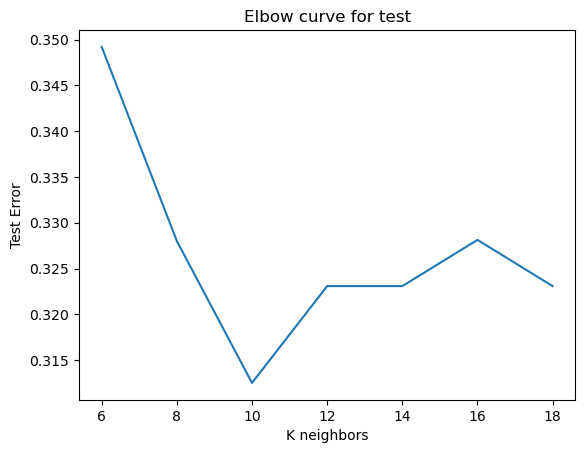

In [24]:
plt.plot(k, test)
plt.xlabel('K neighbors')
plt.ylabel('Test Error')
plt.title('Elbow curve for test')

In [26]:
clf = KNN(n_neighbors = 10)
clf.fit(x_train , y_train)
test_predict = clf.predict(x_test)
k = f1_score(test_predict , y_test)
print ("F1 score is: " , k)

F1 score is:  0.6875


In [27]:
data = pd.read_csv('Bigmart_cleaned.csv')

In [31]:
data 

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0             3735.1380                    0                         1   
1              443.4228                    0                         0   
2             2097.2700                    0                         1   
3              732.3800                    0                         0   
4              994.7052                    0                         1   
...                 ...                  ...                       ...   
8518          2778.3834                    0                         1   
8519           549.2850                    0                         0   
8520          1193.1136                    0                         1   
8521          1845.5976                    0                         0   
8522           765.6700                    0                         1   

      Item_Fat_Content_Regular  Item_Fat_Content_low fat  \
0                            0                         0   
1                            1                         0   
2                            0                         0   
3                            1                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         1                         0   
8520                         0                         0   
8521                         1                         0   
8522                         0                         0   

      Item_Fat_Content_reg  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                        0  ...                 0                   1   
1                        0  ...                 0                   1   
2                        0  ...                 0                   1   
3                        0  ...                 0                   0   
4                        0  ...                 1                   0   
...                    ...  ...               ...                 ...   
8518                     0  ...                 1                   0   
8519                     0  ...                 0                   0   
8520                     0  ...                 0                   0   
8521                     0  ...                 0                   1   
8522                     0  ...                 0                   0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                     0                            1   
1                     0                            0   
2                     0                            1   
3                     0                            0   
4                     0                            0   
...                 ...                          ...   
8518                  0                            0   
8519                  0                            0   
8520                  1                            0   
8521                  0                            0   
85

In [45]:
X = data.drop(['Item_Outlet_Sales'], axis = 1)
Y = data['Item_Outlet_Sales']
X.shape , Y.shape

((8523, 45), (8523,))

In [47]:
data.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                    0                         1   
1           443.4228                    0                         0   
2          2097.2700                    0                         1   
3           732.3800                    0                         0   
4           994.7052                    0                         1   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0                     0   
1                         1                         0                     0   
2                         0                         0                     0   
3                         1                         0                     0   
4                         0                         0                     0   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...                 0                   1                  0   
1  ...                 0                   1                  0   
2  ...                 0                   1                  0   
3  ...                 0                   0                  0   
4  ...                 1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 46 columns]

In [49]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(X)

In [53]:
x = pd.DataFrame(x_scale, columns = x.columns)

ValueError: Shape of passed values is (8523, 45), indices imply (8523, 24)

In [197]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 56)

In [199]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error
clf = KNN(n_neighbors = 10)
clf.fit(X_train , Y_train)
Y_predic = clf.predict(X_test)
mse = mean_squared_error(Y_test , Y_predic)
print("Mean squared error is : " , mse)

Mean squared error is :  1587567.3591610033
